# Simulation of dynamic systems using solve_ivp

Z. Wang and D. Liu, "Stability Analysis for a Class of Systems: From Model-Based Methods to Data-Driven Methods," in IEEE Transactions on Industrial Electronics, vol. 61, no. 11, pp. 6463-6471, Nov. 2014, doi: 10.1109/TIE.2014.2308146.

## Equation (10)

$\left\{\begin{array}{l}\dot{x}_{1}(t)=-x_{1}(t)-x_{1}^{3}(t)+x_{2}(t)+3 u_{1}(t) \\ \dot{x}_{2}(t)=-x_{1}(t)-7 x_{2}(t)-2 x_{2}^{5}(t)+\sin (t) u_{2}(t) \\ y(t)=5 x_{1}(t)+6 u_{2}(t)-e^{-t}, \quad t \geq 0\end{array}\right.$

In [77]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
from scipy.interpolate import interp1d

In [36]:
plt.style.use(["seaborn-white"])
%matplotlib inline

In [3]:
def fy10_dxdt(t, x, u):
    x1, x2, y = x
    u1, u2 = u
    dx1_dt = -x1-x1**3+x2+3*u1(t)
    dx2_dt = -x1-7*x2-2*x2**5+math.sin(math.radians(u2(t)))
    y = dx1_dt+6*u2(t)-np.exp(-t)
    return dx1_dt,dx2_dt,y

In [4]:
N = 100
t_span = [0, N]  
t_eval = np.linspace(0, N, N*10)

u1 = np.sign(np.sin(1*math.pi/10*t_eval)) +  np.cos(3*math.pi/10*t_eval)
u2 = np.sign(np.cos(1*math.pi/10*t_eval)) + np.sin(2*math.pi/10*t_eval)

# u1 = [0]
# [u1.append(j+u1[i]) for i,j in enumerate(np.random.randint(-100, 0, len(t_eval)-1))]
# u2 = [0]
# [u2.append(j+u1[i]) for i,j in enumerate(np.random.randint(-100, 0, len(t_eval)-1))]
u1 = interp1d(x=t_eval, y=u1)
u2 = interp1d(x=t_eval, y=u2)
u=[u1, u2]

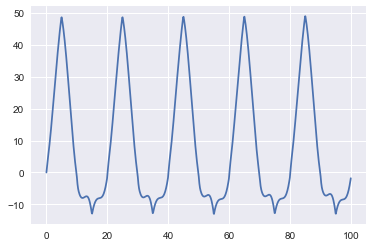

In [5]:
x0 = [0, 0, 0]
y = []
sol = solve_ivp(fy10_dxdt, [0, N], x0,
              args=[u],
              t_eval=t_eval)

plt.figure()
plt.plot(sol.t, sol.y[2].T)
plt.show()

Xy_10 = {"time": t_eval,"vstup1":u1(t_eval), "vstup2":u2(t_eval),"výstup":sol.y[2]}

In [6]:
pd.DataFrame(Xy_10).to_csv("Xy_10.csv", index=0)

## Equation (11)

$\left\{\begin{array}{l}\dot{x}(t)=-\frac{x(t)}{1+x^{2}(t)}+u(t) \\ y(t)=3 x(t)+\cos (t), \quad t \geq 0\end{array}\right.$

In [37]:
def fy11_dxdt(t, x, u):
    x, y =x
    dx_dt = -(x/(1+x**2))+u(t)
    y = 3*dx_dt+math.cos(math.radians(u(t)))
    return dx_dt, y

In [81]:
N = 100
t_span = [0, N]  
t_eval = np.linspace(0, N, N*10)

u =+np.cos(3*math.pi/10*t_eval+20)+np.sin(2*math.pi/10*t_eval+20)
# u = np.cos(3*math.pi/10*t_eval+20)-np.exp(t_eval/100000)/2
u = interp1d(x=t_eval, y=u)

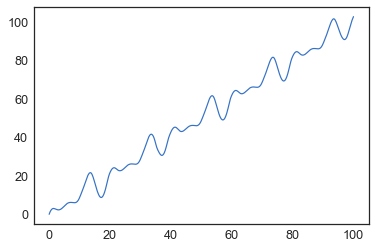

In [82]:
x0 = [0, 0]

sol = solve_ivp(fy11_dxdt, [0, N], x0,
                args=[u],
                t_eval=t_eval)

plt.plot(sol.t, sol.y[1].T)
plt.show()

Xy_11 = {"time": t_eval,"vstup":u(t_eval), "výstup":sol.y[1]}

In [80]:
Xy_11 = pd.DataFrame(Xy_11, index=t_eval)
Xy_11.to_csv("Xy_11.csv",index=0)